# save variables

In [1]:
import tensorflow as tf

/Users/fatu/env/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
tf.reset_default_graph()

In [29]:
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

In [30]:
inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

init_op = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init_op)
    inc_v1.op.run()
    dec_v2.op.run()
    save_path = saver.save(sess, "./tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)

Model saved in path: ./tmp/model.ckpt


# Restoring variables

In [31]:
tf.reset_default_graph()

In [32]:
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

In [33]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./tmp/model.ckpt")
    print("Model restored.")
    print("v1 : %s" % v1.eval())
    print("v2 : %s" % v2.eval())

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


Model restored.
v1 : [1. 1. 1.]
v2 : [-1. -1. -1. -1. -1.]


### Choosing which variables to save and restore

In [20]:
tf.reset_default_graph()

v1 = tf.get_variable("v1", [3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", [5], initializer = tf.zeros_initializer)

saver = tf.train.Saver({"v2": v2})

with tf.Session() as sess:
    v1.initializer.run()
    saver.restore(sess, "./tmp/model.ckpt")
    
    print("v1 : %s" % v1.eval())
    print("v2 : %s" % v2.eval())

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt


v1 : [0. 0. 0.]
v2 : [-1. -1. -1. -1. -1.]


In [35]:
# import the inspect_checkpoint library
from tensorflow.python.tools import inspect_checkpoint as chkp

# print all tensors in checkpoint file
# chkp.print_tensors_in_checkpoint_file("./tmp/model.ckpt", tensor_name='', all_tensors=True)

# tensor_name:  v1
# [ 1.  1.  1.]
# tensor_name:  v2
# [-1. -1. -1. -1. -1.]

# print only tensor v1 in checkpoint file
chkp.print_tensors_in_checkpoint_file("./tmp/model.ckpt", tensor_name='v1', all_tensors=False)

# tensor_name:  v1
# [ 1.  1.  1.]

# print only tensor v2 in checkpoint file
chkp.print_tensors_in_checkpoint_file("./tmp/model.ckpt", tensor_name='v2', all_tensors=False)

# tensor_name:  v2
# [-1. -1. -1. -1. -1.]

TypeError: print_tensors_in_checkpoint_file() missing 1 required positional argument: 'all_tensor_names'

In [1]:
import tensorflow as tf  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
# Clear the current graph in each run, to avoid variable duplication
tf.reset_default_graph()

# Create placeholders for the x and y points
X = tf.placeholder("float")  
Y = tf.placeholder("float")

# Initialize the two parameters that need to be learned
h_est = tf.Variable(0.0, name='hor_estimate')  
v_est = tf.Variable(0.0, name='ver_estimate')

# y_est holds the estimated values on y-axis
y_est = tf.square(X - h_est) + v_est

# Define a cost function as the squared distance between Y and y_est
cost = (tf.pow(Y - y_est, 2))

# The training operation for minimizing the cost function. The
# learning rate is 0.001
trainop = tf.train.GradientDescentOptimizer(0.001).minimize(cost)  

/Users/fatu/env/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0,0.5,'y_train')

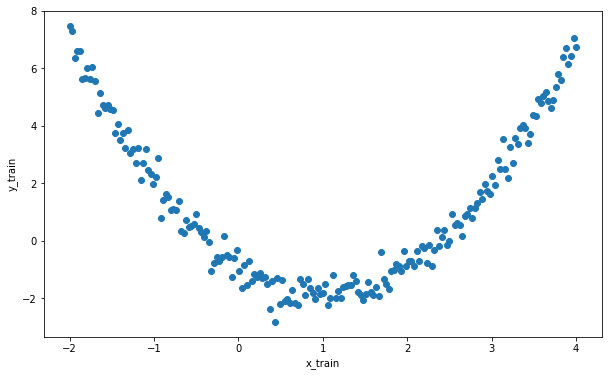

In [2]:
# Use some values for the horizontal and vertical shift
h = 1  
v = -2

# Generate training data with noise
x_train = np.linspace(-2,4,201)  
noise = np.random.randn(*x_train.shape) * 0.4  
y_train = (x_train - h) ** 2 + v + noise

# Visualize the data 
plt.rcParams['figure.figsize'] = (10, 6)  
plt.scatter(x_train, y_train)  
plt.xlabel('x_train')  
plt.ylabel('y_train')  

In [3]:
# Create a Saver object
saver = tf.train.Saver()

init = tf.global_variables_initializer()

# Run a session. Go through 100 iterations to minimize the cost
def train_graph():  
    with tf.Session() as sess:
        sess.run(init)
        for i in range(100):
            for (x, y) in zip(x_train, y_train):

                # Feed actual data to the train operation
                sess.run(trainop, feed_dict={X: x, Y: y})

            # Create a checkpoint in every iteration
            saver.save(sess, './model_iter', global_step=i)

        # Save the final model
        saver.save(sess, './model_final')
        h_ = sess.run(h_est)
        v_ = sess.run(v_est)
    return h_, v_

In [4]:
result = train_graph()  
print("h_est = %.2f, v_est = %.2f" % result)  

h_est = 1.02, v_est = -1.94


In [37]:
import datetime